### Importing Package

In [1]:
import yfinance as yf
from datetime import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms

### Defining start date, end date and ticker

In [159]:
start_date = datetime(2010,1,1)
end_date = datetime.today()
snp_ticker = "^GSPC"

### Retrieving Data

In [160]:
data = yf.download(snp_ticker, start_date, end_date)
data.reset_index(inplace=True)

[*********************100%***********************]  1 of 1 completed


### Ploting the trend

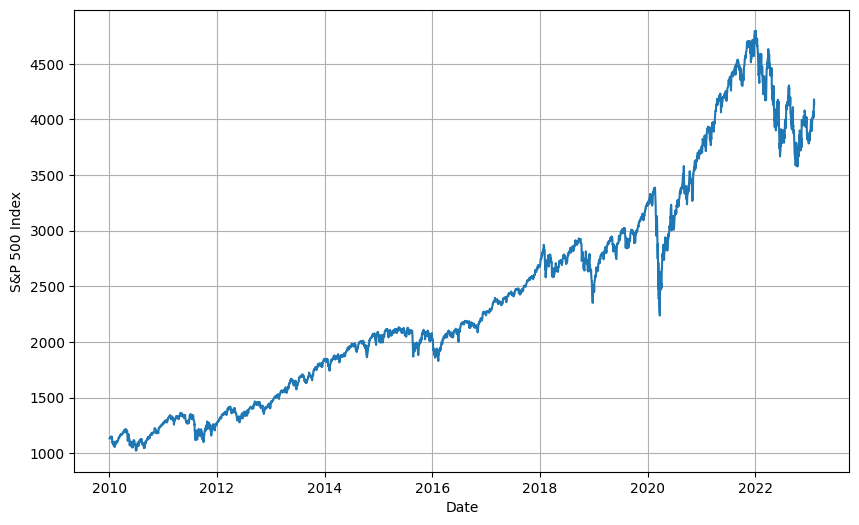

In [42]:
fig = plt.figure(figsize=(10,6))
plt.plot(np.array(data['Date']), np.array(data['Adj Close']))
plt.xlabel("Date")
plt.ylabel("S&P 500 Index")
plt.grid(True)

# Volatility Illustration

---

### Computing Volatility over a Rolling Window of 1 Year, volatility is standard deviation of daily return over a defined time frame. For an example, we have taken historical 1 year time frame to compute, we multiply it with square root of 252 to convert daily volatility to the annualized volatility

---

In [75]:
window_size = 252
data['Daily volatility'] = data['Adj Close'].pct_change().rolling(window_size).std()
data['Annualized volatility'] = data['Adj Close'].pct_change().rolling(window_size).std()*(252**0.5)

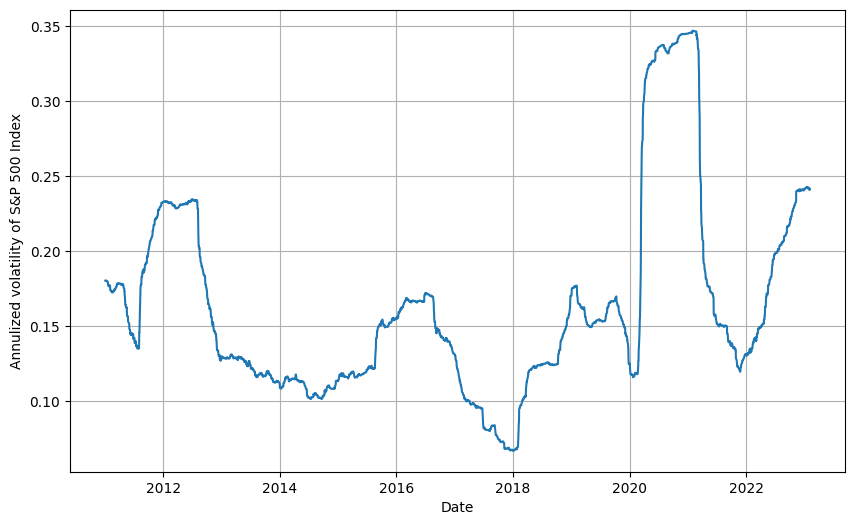

In [76]:
fig = plt.figure(figsize=(10,6))
plt.plot(np.array(data['Date']), np.array(data['Annualized volatility']))
plt.xlabel("Date")
plt.ylabel("Annulized volatility of S&P 500 Index")
plt.grid(True)

### Plotting regions of high volatility and low volatility using rolling window of 90 days

---

In [101]:
vix_ticker = "^VIX"
data_vix = yf.download(vix_ticker, start_date, end_date)
data_vix.reset_index(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [103]:
vol_ma = data['Adj Close'].rolling(90).mean()
vol_ma.index = data_vix['Date']
vol_ma = vol_ma.dropna()

In [104]:
cmap = plt.get_cmap("RdYlGn_r")

In [105]:
cutoff_points = [-np.inf, 14, 18, 24, np.inf] # these are x axis points and in between region will be assigned to labels
labels = range(4)
df = pd.cut(vol_ma, bins=cutoff_points, labels=labels)

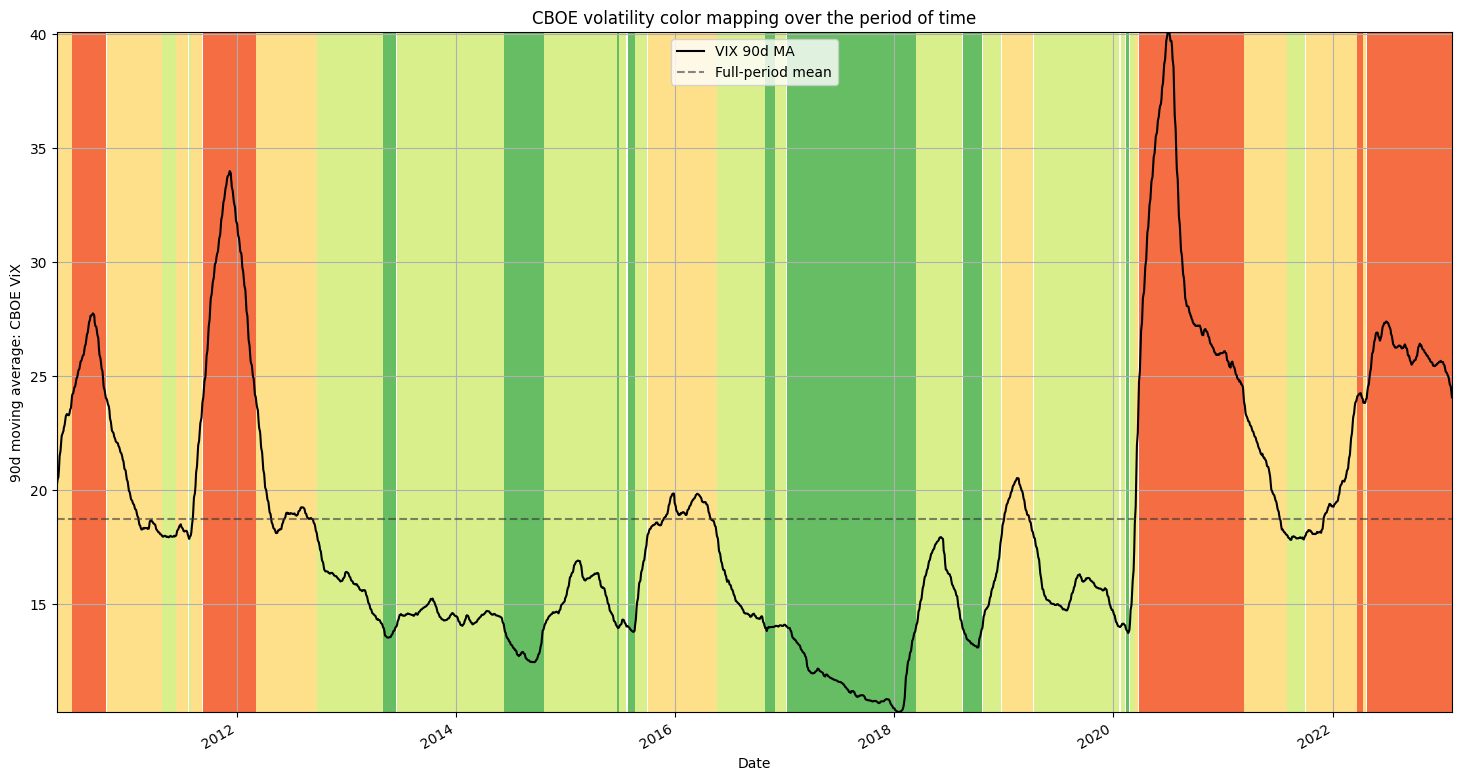

In [108]:
vol_ma.plot(color='black', marker='', figsize=(18, 10) , label='VIX 90d MA')
ax = plt.gca()
ax.set_xlabel("Date")
ax.set_ylabel("90d moving average: CBOE ViX")
ax.grid("False")
ax.set_xlim(xmin=vol_ma.index[0], xmax=vol_ma.index[-1])
ax.set_ylim(ymin=vol_ma.min(), ymax=vol_ma.max())
ax.axhline(data['Adj Close'].mean(), linestyle='dashed', color='xkcd:dark grey', alpha=0.6, label='Full-period mean', marker='')
ax.set_title("CBOE volatility color mapping over the period of time")
ax.legend(loc="upper center")

trans= mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
for i, color in enumerate(cmap([0.2,0.4,0.6,0.8])):
    ax.fill_between(vol_ma.index, 0, 1, where=df==i, facecolor =color, transform=trans)

# Correlation Illustration

---

The CBOE Volatility Index (VIX) is a measure of the expected volatility of the S&P 500 index over the next 30-day period. It is often referred to as the "fear index" or the "investor fear gauge" as it reflects market sentiment and expectations of future market volatility. The VIX is calculated using the prices of S&P 500 index options and is published by the Chicago Board Options Exchange (CBOE).

In [135]:
msft_ticker = "MSFT"
data_msft = yf.download(msft_ticker, start_date, end_date)
data_msft.reset_index(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [136]:
ge_ticker = "GE"
data_ge = yf.download(ge_ticker, start_date, end_date)
data_ge.reset_index(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [137]:
jpmc_ticker = "JPM"
data_jpmc = yf.download(jpmc_ticker, start_date, end_date)
data_jpmc.reset_index(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [153]:
us_10y_yield_ticker = "^TNX"
data_yield = yf.download(us_10y_yield_ticker, start_date, end_date)
data_yield.reset_index(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [161]:
df = pd.DataFrame({
    "Date": data_ge['Date'],
    "GE": data_ge['Adj Close'],
    "MSFT": data_msft['Adj Close'],
    "JPMC": data_jpmc['Adj Close'],
    "S&P 500": data['Adj Close'],
    "US 10y Yield":data_yield['Adj Close']
                  })

In [162]:
df.set_index('Date', inplace=True)

In [163]:
df_corr = df.corr()
print(df_corr)

                    GE      MSFT      JPMC   S&P 500  US 10y Yield
GE            1.000000 -0.507829 -0.393761 -0.357291      0.009107
MSFT         -0.507829  1.000000  0.926342  0.963119     -0.266068
JPMC         -0.393761  0.926342  1.000000  0.974691     -0.212378
S&P 500      -0.357291  0.963119  0.974691  1.000000     -0.262222
US 10y Yield  0.009107 -0.266068 -0.212378 -0.262222      1.000000


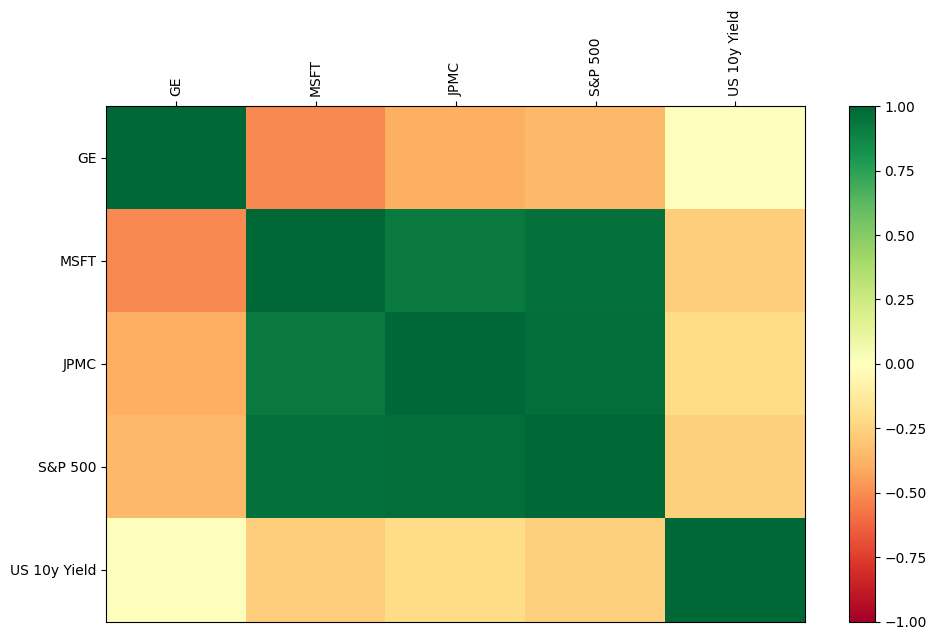

In [164]:
data = df_corr.values
fig = plt.figure(figsize=(10,6.5))
ax = fig.add_subplot(1, 1, 1)

heatmap = ax.pcolor(data, cmap = plt.cm.RdYlGn)
fig.colorbar(heatmap)
ax.set_xticks(np.arange(data.shape[0]) + 0.5, minor = False)
ax.set_yticks(np.arange(data.shape[1]) + 0.5, minor = False)
ax.invert_yaxis()
ax.xaxis.tick_top()

column_labels = df_corr.columns
row_labels = df_corr.index

ax.set_xticklabels(column_labels)
ax.set_yticklabels(row_labels)
plt.xticks(rotation = 90)
heatmap.set_clim(-1, 1)
plt.tight_layout()
plt.show()

<AxesSubplot: >

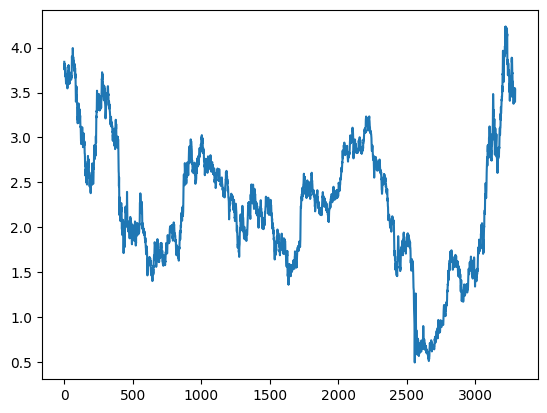

In [156]:
data_yield['Adj Close'].plot()